In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
X_train, X_test, Y_train, Y_test = load("../../preprocessing/classification_data.joblib")
X_train.head()

,the numeric,and numeric,a numeric,of numeric,to numeric,is numeric,I numeric,in numeric,that numeric,it numeric,...,ompa numeric,ra_ numeric,le_to numeric,bra numeric,uch_a numeric,ave_a numeric,n_in_ numeric,ied_ numeric,nd_b numeric,rso numeric
0,0.46875,0.238095,0.45,0.32,0.250000,0.466667,0.095238,0.333333,0.500000,0.222222,...,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.00
1,0.40625,0.666667,0.60,0.20,0.208333,0.466667,0.428571,0.133333,0.166667,0.111111,...,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00
2,0.71875,0.476190,0.35,0.36,0.333333,0.066667,0.333333,0.200000,0.083333,0.166667,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00
3,0.09375,0.190476,0.10,0.08,0.083333,0.000000,0.238095,0.066667,0.083333,0.111111,...,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00
4,0.62500,0.428571,0.35,0.64,0.208333,0.200000,0.000000,0.666667,0.166667,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.25


In [2]:
from sklearn.tree import DecisionTreeClassifier
%run ../../functions/Model.ipynb

In [3]:
dtc = DecisionTreeClassifier(random_state=24)
dtc = build_model(dtc, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy score: 
 1.0
Precision score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
F1 score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

C:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


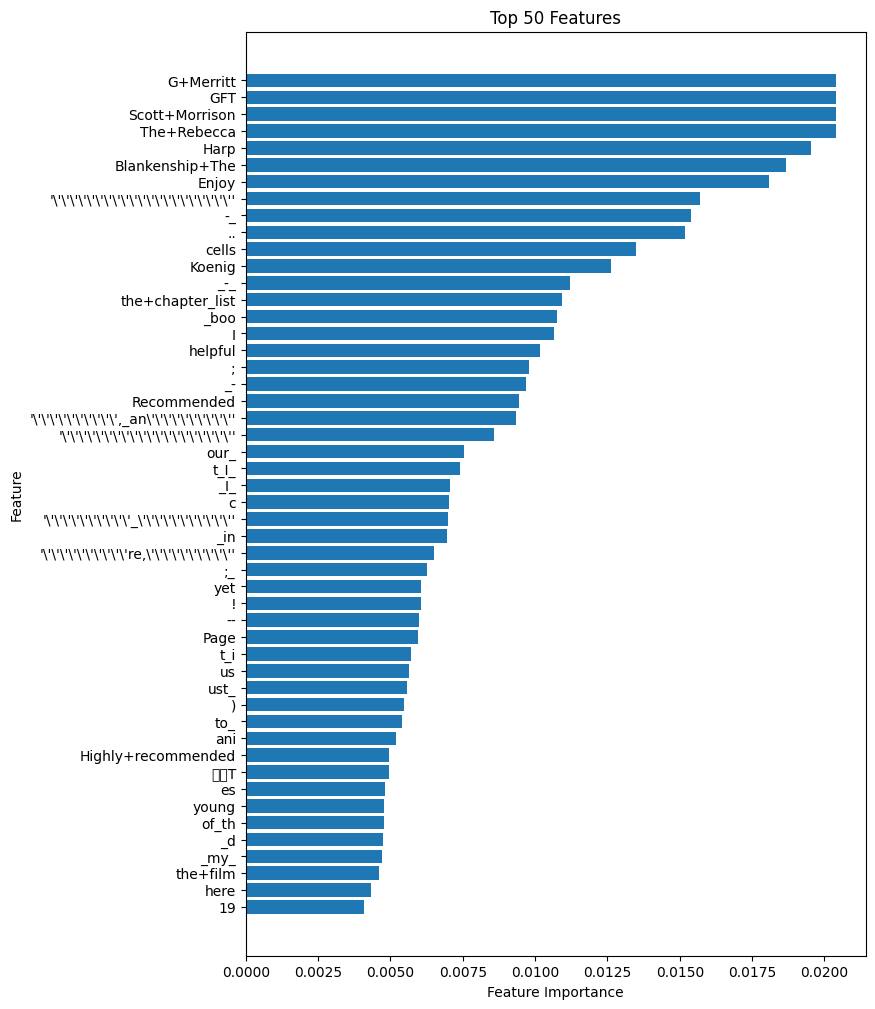

In [4]:
plt.figure(figsize=(8, 12))
importances = dtc.feature_importances_
top_features_indices = importances.argsort()[-50:]
top_features = X_train.columns[top_features_indices]
top_features = [' '.join(feature.split(' ')[:-1]) for feature in X_train.columns[top_features_indices]]

plt.barh(range(len(top_features)), importances[top_features_indices])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Features')
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 40, 60, 100, 120, 200, 400]
}

In [6]:
search = GridSearchCV(DecisionTreeClassifier(random_state=24), param_grid=params, cv=3, error_score='raise')
search.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, 60, 100, 120, 200, 400]})

In [7]:
search.best_params_

{'criterion': 'gini', 'max_depth': 40}

In [8]:
search.best_score_

0.3925

In [9]:
search = build_model(search, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 1  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 1  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy score: 
 0.9891666666666666
Precision score: 
 [0.77, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.86, 1.0, 1.0, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall score: 
 [1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0, 0.96, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 0.92, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 0.96, 1.0, 0.96, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 1.0]
F1 score: 
 [0.87, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92, 0.98, 1.0, 0.98, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 0.98, 1.0

In [10]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=24)
random_forest = build_model(random_forest, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy score: 
 1.0
Precision score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
F1 score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [11]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200, 300, 500, 1000]
}

search_rf = GridSearchCV(RandomForestClassifier(random_state=24), param_grid=params, cv=3)
search_rf.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 200, 300, 500, 1000]})

In [12]:
search_rf.best_params_

{'criterion': 'gini', 'n_estimators': 1000}

In [13]:
search_rf.best_score_

0.765

In [14]:
search_rf = build_model(search_rf, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy score: 
 1.0
Precision score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
F1 score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

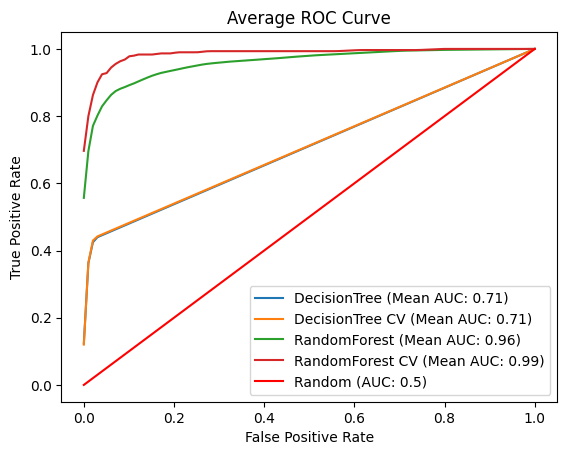

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import mplcursors

models = [dtc, search.best_estimator_, random_forest, search_rf.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV',  'RandomForest', 'RandomForest CV']

y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
class_names = np.unique(Y_test)

for model, model_name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)
    n_classes = y_pred_prob.shape[1]

    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = 0.0

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

    mean_tpr /= n_classes
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (Mean AUC: {mean_auc:.2f})")

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)', color='red')

plt.title("Average ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

In [16]:
from joblib import dump
dump(models, 'trees.joblib')

['trees.joblib']